<a href="https://colab.research.google.com/github/michellepardo142-source/evaluacion-final-u2-ml/blob/main/Michelle_Regresi%C3%B3n_lineal_taxi_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

El *Machine Learning Crash Course* utiliza Colaboratories (Colabs) para todos los ejercicios de programación. Colab es la implementación de [Jupyter Notebook](https://jupyter.org/) de Google. Para más información sobre Colabs y cómo usarlos, visita [Bienvenido a Colaboratory](https://research.google.com/colaboratory).

# Regresión Lineal
En este Colab usarás un conjunto de datos real para entrenar un modelo que prediga la tarifa de un viaje en taxi en Chicago, Illinois.

## Objetivos del Aprendizaje
Después de completar este Colab, serás capaz de:

  * Leer un archivo .csv en un DataFrame de [pandas](https://developers.google.com/machine-learning/glossary/#pandas).
  * Explorar un [conjuntos de datos](https://developers.google.com/machine-learning/glossary/#data_set) utilizando bibliotecas de visualización de Python.
  * Experimentar con diferentes [atributos](https://developers.google.com/machine-learning/glossary/#feature) para construir un modelo de regresión lineal.
  * Ajustar los [hiperparámetros](https://developers.google.com/machine-learning/glossary/#hyperparameter) del modelo.
  * Comparar ejecuciones de entrenamiento usando el [error cuadrático medio](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) y las [curvas de pérdida](https://developers.google.com/machine-learning/glossary/#loss-curve).

## Descripción del Conjunto de Datos
El [conjunto de datos para este ejercicio](https://storage.mtls.cloud.google.com/mlcc-nextgen-internal/chicago_taxi_train.csv) se deriva del [Conjunto de datos de viajes en taxi de la ciudad de Chicago](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew). Los datos de este ejercicio son un subconjunto del conjunto de datos de viajes en taxi y se centran en un período de dos días en mayo de 2022.

# Parte 1 - Configuración del ejercicio


---

## Cargar los módulos requeridos

Este ejercicio depende de varias bibliotecas de Python para ayudar con la manipulación de datos, tareas de aprendizaje automático y visualización de datos.

**Instrucciones**
1. Ejecutar la celda de código **Instalar bibliotecas necesarias**(abajo).
1. Ejecutar la celda de código **Cargar dependencias** (abajo).

In [ ]:
#@title Instalar bibliotecas necesarias

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [ ]:
#@title Código - Cargar dependencias

# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px

## Cargar el conjunto de datos


La siguiente celda de código carga el conjunto de datos y crea un DataFrame de pandas.

Puedes pensar en un DataFrame como una hoja de cálculo con filas y columnas. Las filas representan ejemplos de datos individuales, y las columnas representan los atributos asociados a cada ejemplo

In [ ]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

## Actualizar el dataframe

La siguiente celda de código actualiza el DataFrame para usar solo columnas específicas del conjunto de datos.

Nota que la salida muestra solo una muestra del conjunto de datos, pero debería haber suficiente información para que identifiques las características asociadas con el conjunto de datos y eches un vistazo a los datos reales de algunos ejemplos.

In [ ]:
#@title Código - Leer conjunto de datos

# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Parte 2 - Exploración del conjunto de datos


---

## Ver estadísticas del conjunto de datos

Una gran parte de la mayoría de los proyectos de aprendizaje automático consiste en conocer tus datos. En este paso, utilizarás el método ``DataFrame.describe`` para ver estadísticas descriptivas sobre el conjunto de datos y responder algunas preguntas importantes sobre los datos.
**Instrucciones**
1. Ejecuta la celda de código **Ver estadísticas del conjunto de datos**.
1. Inspecciona la salida y responde estas preguntas:
* ¿Cuál es la tarifa máxima?
* ¿Cuál es la distancia promedio de todos los viajes?
* ¿Cuántas compañías de taxi hay en el conjunto de datos?
* ¿Cuál es el tipo de pago más frecuente?
* ¿Faltan datos en alguna característica?
1. Ejecuta la celda de código **Ver respuestas a las estadísticas del conjunto de datos** para comprobar tus respuestas.

Podrías estar preguntándote por qué hay grupos de valores `NaN` (no es un número) listados en la salida. Al trabajar con datos en Python, puedes ver este valor si el resultado de un cálculo no se puede computar o si falta información. Por ejemplo, en el conjunto de datos de taxis, `PAYMENT_TYPE` y `COMPANY` son características categóricas no numéricas; la información numérica como la media y el máximo no tiene sentido para características categóricas, por lo que la salida muestra `NaN`.

In [ ]:
#@title Código - Ver respuestas a las estadísticas del conjunto de datos

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [ ]:
#@title Hacer doble clic o ejecutar para ver las respuestas sobre las estadísticas del conjunto de datos

answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
#
# Run this code cell to verify your answers.

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? 				Answer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? 		Answer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? 		Answer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? 		Answer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? 				Answer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


## Generar una matriz de correlación
Una parte importante del aprendizaje automático es determinar qué [características](https://developers.google.com/machine-learning/glossary/#feature) se correlacionan con la [etiqueta](https://developers.google.com/machine-learning/glossary/#label). Si alguna vez has tomado un taxi, probablemente tu experiencia te dice que la tarifa suele estar asociada con la distancia recorrida y la duración del viaje. Pero, ¿hay alguna manera de aprender más sobre qué tan bien estas características se correlacionan con la tarifa (etiqueta)?

En este paso, usarás una **matriz de correlación** para identificar características cuyos valores se correlacionan bien con la etiqueta. Los valores de correlación tienen los siguientes significados:

 * **`1.0`**: correlación positiva perfecta; es decir, cuando un atributo aumenta, el otro también aumenta.
* **`-1.0`**: correlación negativa perfecta; es decir, cuando un atributo aumenta, el otro disminuye.
* **`0.0`**: sin correlación; las dos columnas [no están relacionadas linealmente](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

En general, cuanto mayor sea el valor absoluto de una correlación, mayor será su poder predictivo.  

**Instrucciones**  

1. Inspeccionar el código en la celda de código **Ver matriz de correlación**.  
1. Ejecutar la celda de código **Ver matriz de correlación** e inspecciona el resultado.  
1. **Comprobar tu comprensión** respondiendo a estas preguntas:  
* ¿Qué característica se correlaciona más fuertemente con la variable FARE?  
* ¿Qué característica se correlaciona menos fuertemente con la variable FARE?



In [ ]:
#@title Código - Ver matriz de correlación
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [ ]:
#@title Hacer doble clic para ver las respuestas sobre la matriz de correlación

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


## Visualizar relaciones en el conjunto de datos

A veces es útil visualizar las relaciones entre las características de un conjunto de datos; una manera de hacerlo es con un gráfico de pares. Un **gráfico de pares** genera una cuadrícula de gráficos bivariantes para visualizar la relación de cada característica con todas las demás, todo en un solo lugar.

**Instrucciones**
1. Ejecutar la celda de código **Ver gráfico de pares**.

In [ ]:
#@title Código - Ver gráfico de pares
px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Parte 3 - Entrenar el modelo

## Definir funciones para construir y entrenar un modelo

El código que necesitas para construir y entrenar tu modelo está en la celda de código **Definir funciones de ML**. Si deseas explorar este código, expande la celda de código y échale un vistazo.

**Instrucciones**
1. Ejecutar la celda de código **Definir funciones de ML**

In [ ]:
#@title Código - Definir funciones de ML

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


## Entrenar el modelo con una característica

En este paso, entrenarás el modelo para predecir el costo de la tarifa usando una **sola característica**. Anteriormente, viste que `TRIP_MILES` (distancia) se correlaciona más fuertemente con `FARE`, así que comencemos con `TRIP_MILES` como la característica para tu primera ejecución de entrenamiento.


**Instrucciones**

1. Ejecutar la celda de código de **Experimento 1** para construir tu modelo con una característica.
1. Revisar la salida del entrenamiento.
1. **Comprueba tu comprensión** respondiendo estas preguntas:
  * ¿Cuántas épocas tomó para converger el modelo final?
  * ¿Qué tan bien se ajusta el modelo a los datos de muestra?

Durante el entrenamiento, deberías ver el error cuadrático medio (RMSE) en la salida. Las unidades del RMSE son las mismas que las unidades de la etiqueta (dólares). En otras palabras, puedes usar el RMSE para determinar cuánto se desvían, en promedio, las tarifas predichas en dólares con respecto a los valores observados.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 227.0972 - rmse: 15.0327
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 72.0496 - rmse: 8.4428
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.9527 - rmse: 4.5753
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.3074 - rmse: 4.1526
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.0278 - rmse: 4.2224
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.9366 - rmse: 4.2036
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4803 - rmse: 3.7993
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.0077 - rmse: 3.7341
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3617 - rmse: 3.7840
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3469 - rmse: 3.7839
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.6003 - rmse: 3.8121
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1762 - rmse: 3.7555

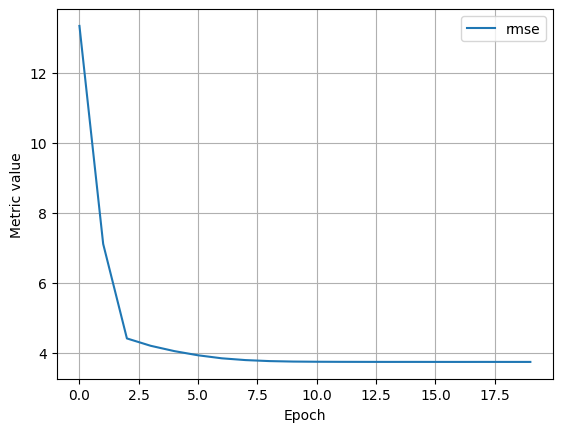

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4016.6802 - rmse: 62.1804
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3237.4949 - rmse: 56.8827
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3317.7732 - rmse: 57.5452
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3115.5269 - rmse: 55.2872
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3097.1765 - rmse: 55.2617
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3390.1511 - rmse: 58.1040
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3200.9832 - rmse: 56.3321
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3326.5125 - rmse: 57.5175
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3190.7913 - rmse: 55.9351
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3403.4624 - rmse: 58.1981
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3063.0784 - rmse: 54.6801
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

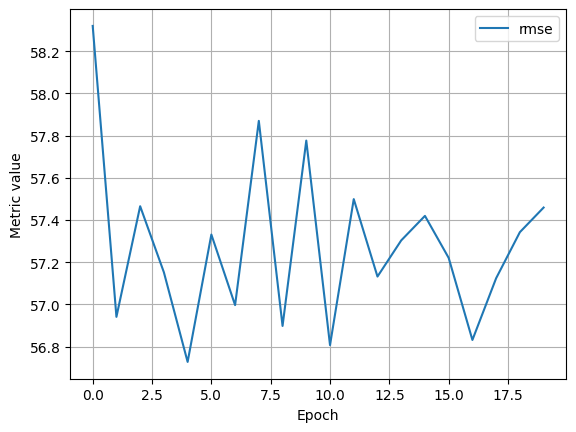

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 10.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 209.8199 - rmse: 14.4839
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192.0293 - rmse: 13.8566
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173.0989 - rmse: 13.1560
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 154.8613 - rmse: 12.4439
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 140.6550 - rmse: 11.8581
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 121.7122 - rmse: 11.0320
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 109.6271 - rmse: 10.4669
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 95.5805 - rmse: 9.7751
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85.0778 - rmse: 9.2198
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 71.9381 - rmse: 8.4808
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 64.5315 - rmse: 8.0299
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53.9830 - 

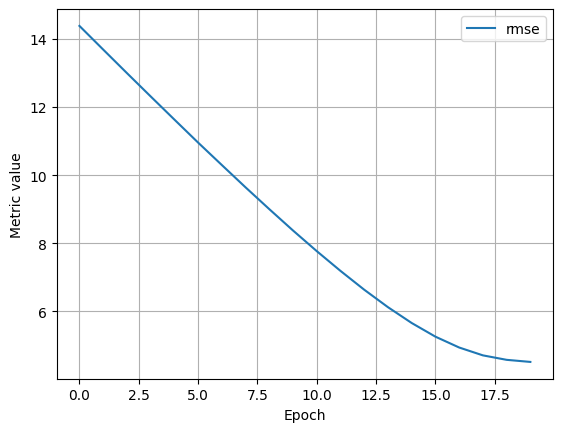

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.0001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 397050.5000 - rmse: 616.4655
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 332976.4062 - rmse: 575.7823
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 311233.1562 - rmse: 553.6271
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 334660.1562 - rmse: 577.7980
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 317383.6562 - rmse: 562.2906
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 336237.1875 - rmse: 579.4496
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 324212.0625 - rmse: 566.8403
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 319953.9375 - rmse: 564.2417
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 306002.8125 - rmse: 551.8181
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 322967.1875 - rmse: 568.1296
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328074.5938 - rmse: 570.9738
Epoch 12/20
634/634

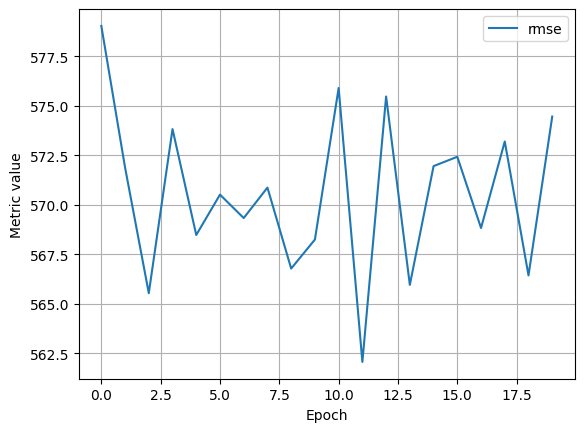

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 100.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/2
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 927.6731 - rmse: 30.4404
Epoch 2/2
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 537.8340 - rmse: 23.1719
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


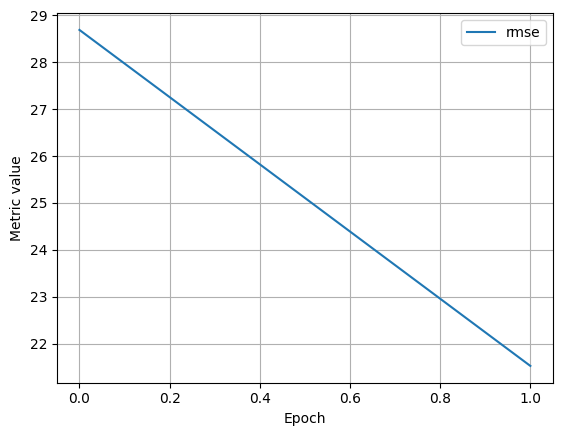

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 2,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 820.5426 - rmse: 28.6251
Epoch 2/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 454.2117 - rmse: 21.2927
Epoch 3/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 203.9454 - rmse: 14.2505
Epoch 4/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59.4830 - rmse: 7.6775
Epoch 5/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.5016 - rmse: 4.0582
Epoch 6/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6615 - rmse: 3.8186
Epoch 7/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2829 - rmse: 3.9053
Epoch 8/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.2014 - rmse: 3.7632
Epoch 9/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3869 - rmse: 3.7877
Epoch 10/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.4314 - rmse: 3.6545
Epoch 11/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.8629 - rmse: 3.8500
Epoch 12/200
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.659

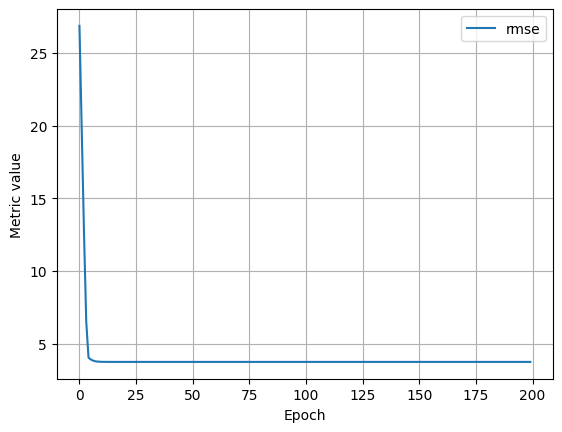

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 200,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 390.7599 - rmse: 19.6652
Epoch 2/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 51.3398 - rmse: 7.0648
Epoch 3/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16.0789 - rmse: 3.9961
Epoch 4/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 15.3279 - rmse: 3.9103
Epoch 5/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.0350 - rmse: 3.7331
Epoch 6/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.8657 - rmse: 3.8485
Epoch 7/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.7546 - rmse: 3.7032
Epoch 8/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.1132 - rmse: 3.6179
Epoch 9/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13.3826 - rmse: 3.6549
Epoch 10/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14.1216 - rmse: 3.7557
Epoch 11/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.2394 - rmse: 3.7709
Epoch 12/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss

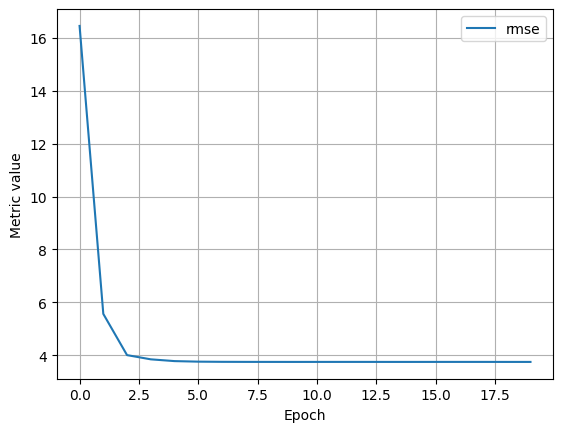

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 25,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 133.3911 - rmse: 11.5495 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 132.1025 - rmse: 11.4936
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 130.1449 - rmse: 11.4080
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 130.7357 - rmse: 11.4339
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 129.7107 - rmse: 11.3890
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 129.2976 - rmse: 11.3709
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 128.2282 - rmse: 11.3238
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 127.4672 - rmse: 11.2901
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 127.7062 - rmse: 11.3007
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 126.4372 - rmse: 11.2444
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 125.8227 - rmse: 11.2171
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 126.1620 - rmse: 11.2321
Epoch 13/20


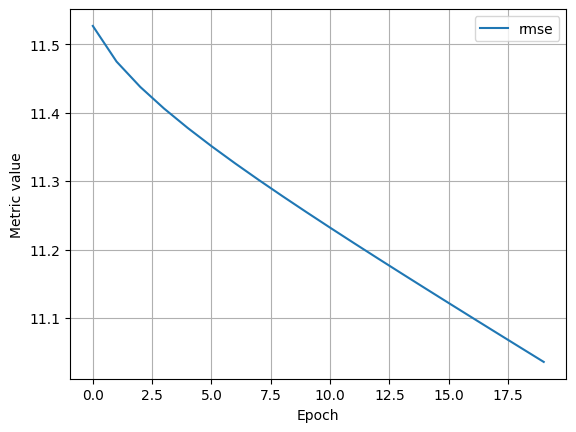

In [ ]:
#@title Código - Experimento 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 15847,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

In [ ]:
#@title Hacer doble clic para ver las respuestas para entrenar el modelo con una característica

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.

